In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandefault/train.csv
/kaggle/input/loandefault/test.csv


In [90]:
import sklearn
loan_default = pd.read_csv('/kaggle/input/loandefault/train.csv')
loan_default.drop(['ID'],inplace=True, axis=1)
loan_default

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [91]:
print("Shape of the data frame: ", loan_default.shape)
print("Total null values: ", loan_default.isna().sum())
print("Duplicate values: ", loan_default.duplicated().sum())

Shape of the data frame:  (67463, 34)
Total null values:  Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type        

**Remove duplicate (We do not need it here as there is no duplicate values)**

In [92]:
# loan_default.drop_duplicates(inplace=True)
# print("Shape of the data frame: ",loan_default.shape)
# print("\n")
print("Loan Status categories with its count \n", loan_default["Loan Status"].value_counts())

Loan Status categories with its count 
 Loan Status
0    61222
1     6241
Name: count, dtype: int64


In [93]:
loan_default.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Loan Status"] = label_encoder.fit_transform(loan_default["Loan Status"])
print("\n")
print(loan_default["Loan Status"].value_counts())



Loan Status
0    61222
1     6241
Name: count, dtype: int64


In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Batch Enrolled"] = label_encoder.fit_transform(loan_default["Batch Enrolled"])
print("\n")
print(loan_default["Batch Enrolled"].value_counts())



Batch Enrolled
25    3626
4     3142
0     2996
13    2557
19    2425
7     2403
2     2298
10    2290
18    2257
29    2248
27    2054
17    1963
21    1864
8     1844
11    1790
14    1775
23    1774
26    1766
32    1717
34    1709
33    1677
36    1639
6     1461
20    1421
40    1404
16    1399
15    1398
31    1303
28    1140
35    1127
37    1105
22    1068
12     895
5      894
30     887
9      842
3      802
39     768
24     728
38     711
1      296
Name: count, dtype: int64


In [96]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Grade"] = label_encoder.fit_transform(loan_default["Grade"])
print("\n")
print(loan_default["Grade"].value_counts())



Grade
2    19085
1    18742
0    12055
3     8259
4     6446
5     2246
6      630
Name: count, dtype: int64


In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Sub Grade"] = label_encoder.fit_transform(loan_default["Sub Grade"])
print("\n")
print(loan_default["Sub Grade"].value_counts())



Sub Grade
8     4462
10    4188
7     3999
4     3540
6     3520
9     3408
15    3304
13    3250
11    3219
12    3121
5     2924
14    2472
3     2264
18    2050
16    1963
19    1952
1     1837
17    1824
21    1746
2     1685
0     1364
22    1321
20    1298
23    1117
26     947
25     824
24     769
29     582
27     578
31     447
28     441
30     366
34     284
32     246
33     151
Name: count, dtype: int64


In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Employment Duration"] = label_encoder.fit_transform(loan_default["Employment Duration"])
print("\n")
print(loan_default["Employment Duration"].value_counts())



Employment Duration
0    36351
2    24150
1     6962
Name: count, dtype: int64


In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Verification Status"] = label_encoder.fit_transform(loan_default["Verification Status"])
print("\n")
print(loan_default["Verification Status"].value_counts())



Verification Status
1    33036
2    18078
0    16349
Name: count, dtype: int64


In [100]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Loan Title"] = label_encoder.fit_transform(loan_default["Loan Title"])
print("\n")
print(loan_default["Loan Title"].value_counts())



Loan Title
38    30728
49    24841
42     3544
75     2455
60     2211
      ...  
61        6
80        5
54        5
21        4
86        4
Name: count, Length: 109, dtype: int64


In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Initial List Status"] = label_encoder.fit_transform(loan_default["Initial List Status"])
print("\n")
print(loan_default["Initial List Status"].value_counts())



Initial List Status
1    36299
0    31164
Name: count, dtype: int64


In [102]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_default["Application Type"] = label_encoder.fit_transform(loan_default["Application Type"])
print("\n")
print(loan_default["Application Type"].value_counts())

label_encoder = LabelEncoder()
loan_default["Batch Enrolled"] = label_encoder.fit_transform(loan_default["Batch Enrolled"])
print("\n")
print(loan_default["Batch Enrolled"].value_counts())

label_encoder = LabelEncoder()
loan_default["Interest Rate"] = label_encoder.fit_transform(loan_default["Interest Rate"])
print("\n")
print(loan_default["Interest Rate"].value_counts())

label_encoder = LabelEncoder()
loan_default["Payment Plan"] = label_encoder.fit_transform(loan_default["Payment Plan"])
print("\n")
print(loan_default["Payment Plan"].value_counts())

# label_encoder = LabelEncoder()
# loan_default["Batch Enrolled"] = label_encoder.fit_transform(loan_default["Batch Enrolled"])
# print("\n")
# print(loan_default["Batch Enrolled"].value_counts())




Application Type
0    67340
1      123
Name: count, dtype: int64


Batch Enrolled
25    3626
4     3142
0     2996
13    2557
19    2425
7     2403
2     2298
10    2290
18    2257
29    2248
27    2054
17    1963
21    1864
8     1844
11    1790
14    1775
23    1774
26    1766
32    1717
34    1709
33    1677
36    1639
6     1461
20    1421
40    1404
16    1399
15    1398
31    1303
28    1140
35    1127
37    1105
22    1068
12     895
5      894
30     887
9      842
3      802
39     768
24     728
38     711
1      296
Name: count, dtype: int64


Interest Rate
3618     2
12837    2
22100    2
18517    2
38319    2
        ..
38819    1
60254    1
7853     1
65282    1
57981    1
Name: count, Length: 67448, dtype: int64


Payment Plan
0    67463
Name: count, dtype: int64


In [103]:
X = loan_default.drop(["Loan Status"], axis=1)
Y = loan_default["Loan Status"]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [105]:
print(data.dtypes)

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[12231,     4],
       [ 1258,     0]])

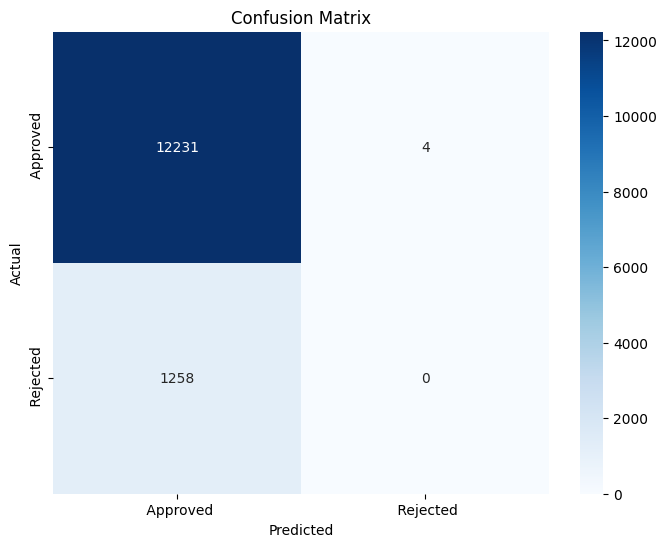

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

# Set labels, title, and axis ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels([' Approved', ' Rejected'])
ax.yaxis.set_ticklabels([' Approved', ' Rejected'])

# Display the plot
plt.show()

In [110]:
y_pred = classifier.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('The accuracy of the Random Forest is:', accuracy)

The accuracy of the Random Forest is: 0.9064700214926258


In [112]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12235
           1       0.00      0.00      0.00      1258

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



In [113]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print('accuracy:',accuracy_score(y_pred,Y_test))
print('precision:',precision_score(y_pred,Y_test,average='micro'))
print('recall:',recall_score(y_pred,Y_test,average='micro'))
print('f1_score:',f1_score(y_pred,Y_test,average='micro'))

accuracy: 0.9064700214926258
precision: 0.9064700214926258
recall: 0.9064700214926258
f1_score: 0.9064700214926258
